# **TASK 1: Exploratory Data Analysis (EDA) on Retail Sales Data**



**Description:**
Performing exploratory data analysis (EDA) to uncover patterns, trends, and insights that can
help the retail business.

# Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# Data Loading:

In [2]:
dataset = pd.read_csv('C:/Users/iamsh/Downloads/retail_sales_dataset.csv')

In [3]:
dataset.shape

(1000, 9)

In [4]:
df = pd.DataFrame(dataset)

def assign_age_group(age):
    if 18 <= age <= 24:
        return '18-24'
    elif 25 <= age <= 34:
        return '25-34'
    elif 35 <= age <= 44:
        return '35-44'
    elif 45 <= age <= 54:
        return '45-54'
    elif 55 <= age <= 64:
        return '55-64'

df['Age Group'] = df['Age'].apply(assign_age_group)


In [5]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,25-34
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,25-34
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,45-54
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,35-44
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,25-34


In [6]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age Group
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,55-64
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,45-54
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,18-24
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,35-44
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120,45-54


# Data Cleaning:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
 9   Age Group         1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [8]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
Age Group           0
dtype: int64

In [9]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount',
       'Age Group'],
      dtype='object')

In [10]:
# describe() for specific columns

df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].describe()

,Age,Quantity,Price per Unit,Total Amount
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,41.39200,2.514000,179.890000,456.000000
std,13.68143,1.132734,189.681356,559.997632
min,18.00000,1.000000,25.000000,25.000000
25%,29.00000,1.000000,30.000000,60.000000
50%,42.00000,3.000000,50.000000,135.000000
75%,53.00000,4.000000,300.000000,900.000000
max,64.00000,4.000000,500.000000,2000.000000


# Exploratory Data Analysis:
# Gender

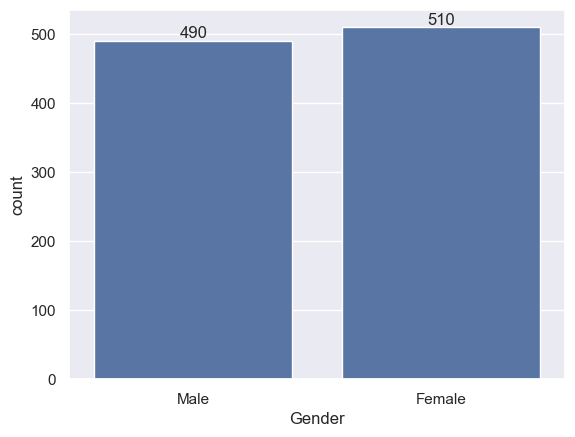

In [11]:
ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Total Amount'>

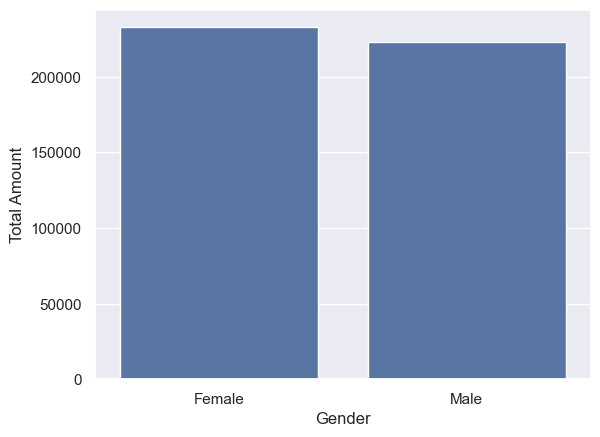

In [12]:
sales_gen = df.groupby(['Gender'], as_index=False)['Total Amount'].sum().sort_values(by='Total Amount', ascending=False)

sns.barplot(x= 'Gender', y= 'Total Amount', data= sales_gen)

**From above graphs we can see that females buyers are little greater than males and even the purchasing power of females are little greater than males**

# Age

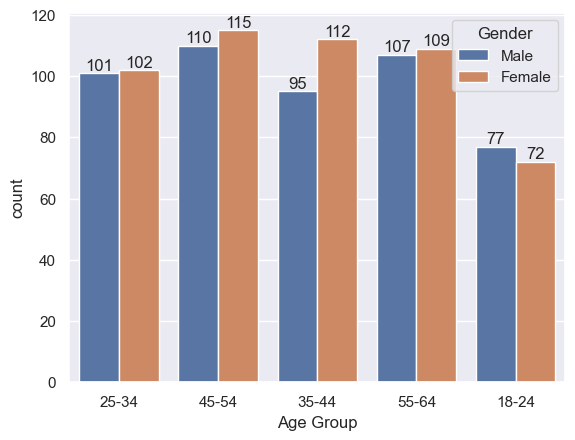

In [13]:
ax = sns.countplot(data= df, x= 'Age Group', hue= 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Total Amount'>

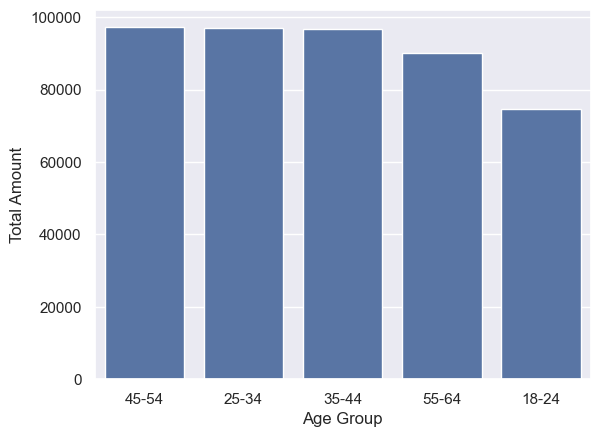

In [14]:
# Total Amount vs Age Group

sales_age = df.groupby(['Age Group'], as_index=False)['Total Amount'].sum().sort_values(by='Total Amount', ascending=False)

sns.barplot(x= 'Age Group', y= 'Total Amount', data= sales_age)

**From above graphs we can see that most of the buyers are of age group between 45-54, 25-34 and 35-44**

# Product Category 

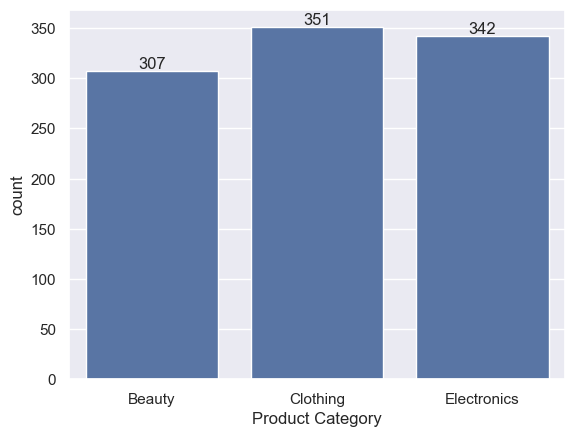

In [15]:
ax= sns.countplot(data = df, x= 'Product Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product Category', ylabel='Total Amount'>

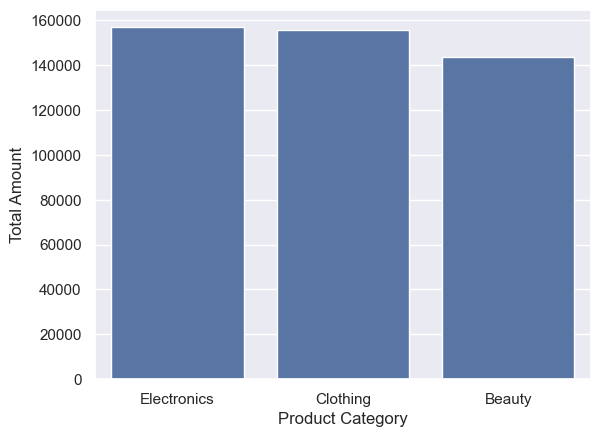

In [16]:
# Product Category vs Total Amount

sales_procat = df.groupby(['Product Category'], as_index=False)['Total Amount'].sum().sort_values(by='Total Amount', ascending=False)

sns.barplot(x= 'Product Category', y= 'Total Amount', data= sales_procat)

<Axes: xlabel='Product Category', ylabel='Price per Unit'>

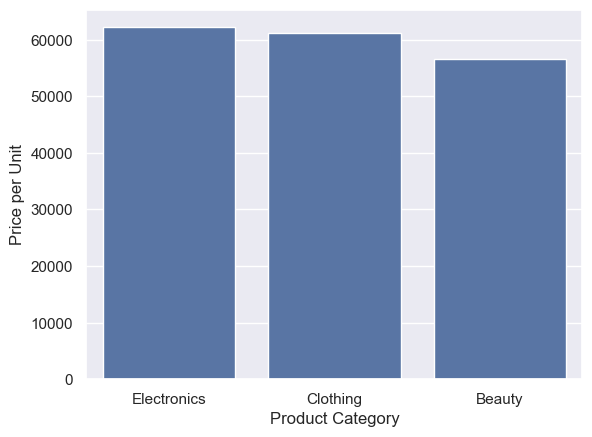

In [17]:
# Product Category vs Price per Unit

sales_procat = df.groupby(['Product Category'], as_index=False)['Price per Unit'].sum().sort_values(by='Price per Unit', ascending=False)

sns.barplot(x= 'Product Category', y= 'Price per Unit', data= sales_procat)


<Axes: xlabel='Product Category', ylabel='Quantity'>

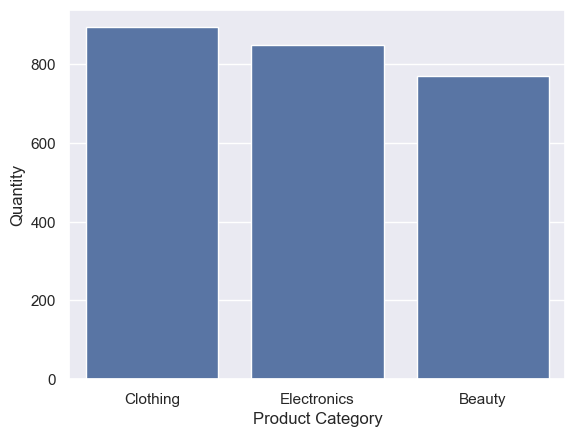

In [18]:
# Product Category vs Quantity

sales_procat = df.groupby(['Product Category'], as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)

sns.barplot(x= 'Product Category', y= 'Quantity', data= sales_procat)


**From above graphs we can see that most of the quantity & total sales/amount are from Clothing and Electronics respectively**

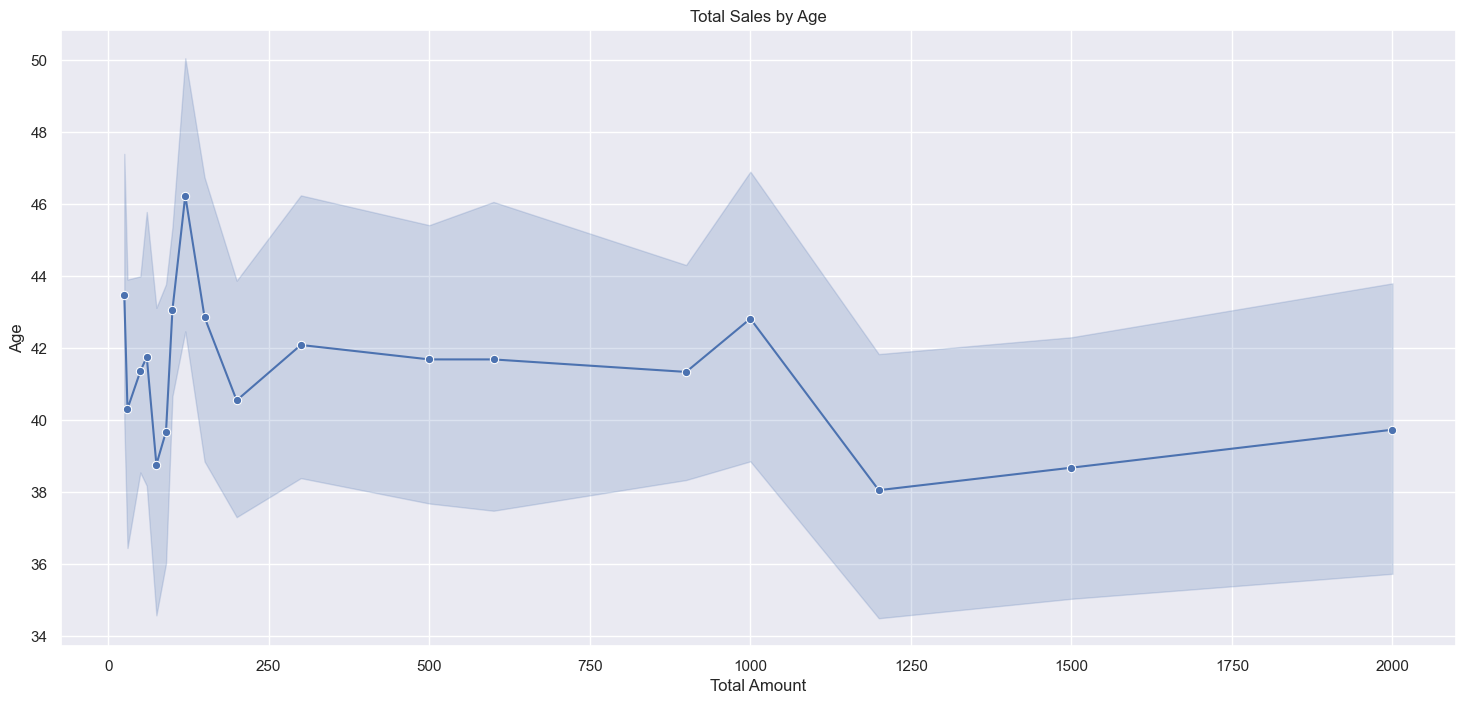

In [19]:
plt.figure(figsize=(18, 8))
sns.lineplot(x='Total Amount', y='Age', data=df, marker='o')

plt.title('Total Sales by Age')
plt.xlabel('Total Amount')
plt.ylabel('Age')


plt.show()


**From above graph we can see the relationship between Total Amount and Age, highlighting how sales vary across different age groups**

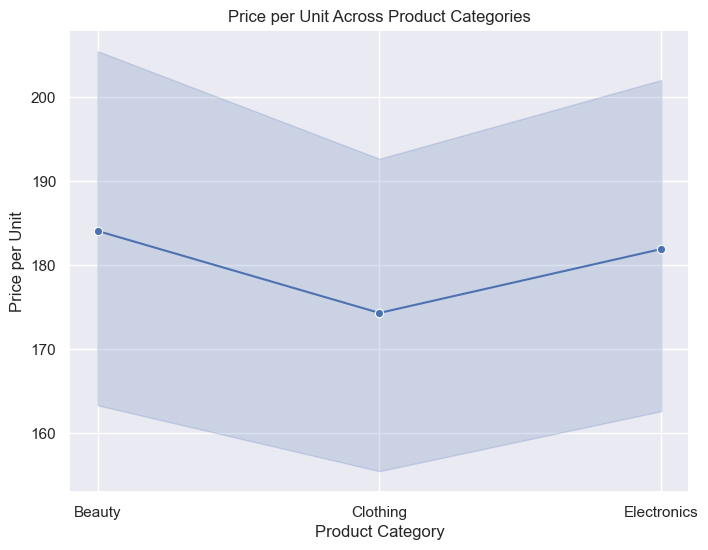

In [20]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='Product Category', y='Price per Unit', data=df, marker='o')

plt.title('Price per Unit Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Price per Unit')


plt.show()


**From above graph we can see the variation of Price per Unit across different Product Categories, highlighting how prices differ between categories**

In [21]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [22]:
corelation = numeric_df.corr()

<Axes: >

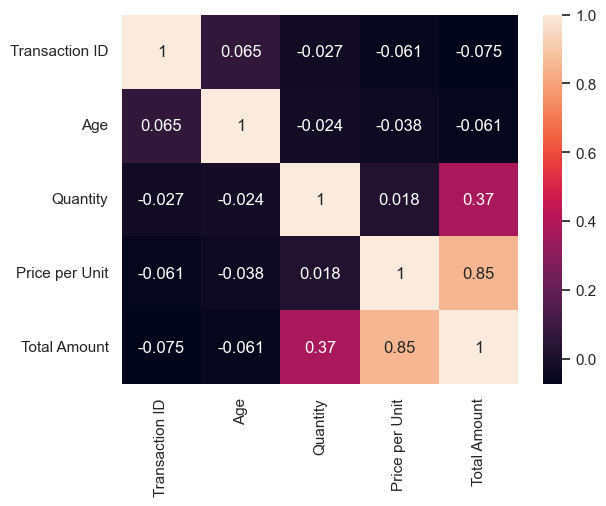

In [23]:
sns.heatmap(corelation, xticklabels= corelation.columns, yticklabels=corelation.columns,annot=True)

**From the above graph we can see the correlation between different variables in the dataset, highlighting the strength and direction of relationships between them**

# Actionable Recommendations:

# Gender-based Sales Analysis

**Insight:** The analysis shows significant differences in the total amount spent by gender.

**Recommendations:** Target marketing campaigns toward the gender segment that spends less by offering personalized promotions or discounts.
Develop gender-specific product bundles or loyalty programs to increase engagement and spending in underperforming segments.

# Age Group Segmentation

**Insight:** Sales data reveals clear patterns of spending across different age groups, with certain age brackets contributing more to total sales.|

**Recommendation:** Focus advertising efforts on the most profitable age groups (e.g., 25-34 or 35-44), possibly by tailoring messages to their preferences.
Consider expanding product offerings to better meet the needs of underrepresented age groups, encouraging increased sales through product relevance.

# Product Category Analysis

**Insight:** The total amount sold, price per unit, and quantity sold vary significantly across product categories.

**Recommendation:** For high-selling categories, consider optimizing inventory levels to prevent stockouts.
In low-selling categories, consider running targeted promotions or reducing pricing to encourage more purchases.
Use pricing data to optimize product margins, ensuring that categories with higher prices per unit are highlighted in premium offerings.

# Correlation Between Features

**Insight:** The heatmap shows correlations between variables, which could inform pricing and inventory decisions.

**Recommendation:** Use strongly correlated variables (e.g., age and spending) to develop predictive models for targeted marketing.
If price per unit correlates strongly with total sales, consider adjusting pricing strategies in response to demand elasticity.

# Sales by Age and Total Amount

**Insight:** The analysis of total sales by age shows a distinct pattern where certain age groups are more likely to make higher purchases.

**Recommendation:** Leverage this insight to craft age-specific marketing strategies, offering exclusive promotions or product recommendations based on spending behavior for each age group.
Implement targeted discount campaigns for younger age groups to increase their spending behavior.